In [1]:
#-----------------------Laboratorio 08----------------------------
#Luiz Felipe Barros Alves
#Mat: 120110674

In [355]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

In [356]:
# lumapiFile = "/opt/lumerical/v221/api/python/lumapi.py"
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
lumapi = imp.load_source("lumapi", lumapiFile)
fdtdApi = lumapi.FDTD(hide = False)

Exception ignored in: <function Lumerical.__del__ at 0x000001F4B78F8C20>
Traceback (most recent call last):
  File "C:\Program Files\Lumerical\v221\api\python\lumapi.py", line 1196, in __del__
    close(self.handle)
  File "C:\Program Files\Lumerical\v221\api\python\lumapi.py", line 245, in close
    iapi.appClose(handle)
ctypes.ArgumentError: argument 1: TypeError: expected Session instance instead of Session


In [357]:
# units
um = 1e-6
nm = 1e-9

In [358]:
sub_material = 'SiO2 (Glass) - Palik'
core_material = 'Si (Silicon) - Palik'

gap = 200*nm

x_span_core =  10.35*um # para 50/50 otimizado
y_span_core =  450*nm
z_span_core =  220*nm

x_core = 0*um
y_core = y_span_core+gap
z_core = 0.0*um

wg90Raius = 10*um

y_span_guia_reto = 2*um

## Create Acoplador Direcional


In [359]:
fdtdApi.switchtolayout()
fdtdApi.deleteall()

# Adicionando guias retos - acoplador
fdtdApi.addrect()
fdtdApi.set("name", "Lc")
fdtdApi.set("material", core_material)
fdtdApi.set("x", x_core)
fdtdApi.set("x span", x_span_core)
fdtdApi.set("y", y_core)
fdtdApi.set("y span", y_span_core)
fdtdApi.set("z", z_core)
fdtdApi.set("z span", z_span_core)

fdtdApi.copy()
fdtdApi.set("name", "Lc_lower")
fdtdApi.set("y", 0)
fdtdApi.set('x span', x_span_core + wg90Raius*2 + 4*um)

# Adicionando guia bend
fdtdApi.addobject("90_bend_wg")
fdtdApi.set("name", "right")
fdtdApi.set("base height", z_span_core)
fdtdApi.set("base width", y_span_core)
fdtdApi.set("first axis", 'z')
fdtdApi.set('radius', wg90Raius)
fdtdApi.set('rotation 1', -90)
fdtdApi.set('x', x_span_core/2)
fdtdApi.set('y', y_core+wg90Raius)
fdtdApi.set('z', z_core)
fdtdApi.set('material', core_material)

fdtdApi.copy()
fdtdApi.set("name", "left")
fdtdApi.set('rotation 1', 180)
fdtdApi.set('x', -x_span_core/2)

# Adicionando guias retos auxiliares
fdtdApi.addrect()
fdtdApi.set("name", "wg_1")
fdtdApi.set("material", core_material)
fdtdApi.set("x", -(x_span_core + wg90Raius*2)/2)
fdtdApi.set("x span", y_span_core)
fdtdApi.set("y", wg90Raius+y_core+y_span_guia_reto/2)
fdtdApi.set("y span", y_span_guia_reto)
fdtdApi.set("z", z_core)
fdtdApi.set("z span", z_span_core)

fdtdApi.copy()
fdtdApi.set("name", "wg_2")
fdtdApi.set("x", (x_span_core + wg90Raius*2)/2)


## Criação Solver FDTD e monitores


In [360]:
## Banda de operação
wvlngth_start = 1500 * nm
wvlngth_stop = 1600 * nm
nmbFrqPnts = 21

## Parâmetros do solver FDTD
# Tempo de simulação
simulation_time = (np.pi * wg90Raius + x_span_core)*7/ c + 200e-15

# Dimensões do volume do solver
x_FDTD = 0
y_FDTD = 0
x_span_FDTD = x_span_core + wg90Raius*2 + 2*um
y_span_FDTD = wg90Raius + 2*um + 1.5*um
z_span_FDTD = 4*um

# Material
backGroundMaterial = sub_material

# Precisão do mesh
mesh_accuracy = 2

# Condições de fronteira
z_min_bc = "Anti-symmetric"

simulation_time

1.1752129446541497e-12

In [361]:
fdtdApi.switchtolayout()
fdtdApi.select('FDTD')
fdtdApi.delete()
fdtdApi.select('monitor')
fdtdApi.delete()


# Adiciona o solver
fdtdApi.addfdtd()
fdtdApi.set("x", x_FDTD)
fdtdApi.set("x span", x_span_FDTD)
fdtdApi.set("y", wg90Raius/2)
fdtdApi.set("y span", y_span_FDTD)
fdtdApi.set("z", 0)
fdtdApi.set("z span", z_span_FDTD)
fdtdApi.set("background material", backGroundMaterial)
fdtdApi.set("mesh accuracy", mesh_accuracy)
fdtdApi.set("simulation time", simulation_time)
fdtdApi.set("z min bc", z_min_bc)

fdtdApi.addprofile();
fdtdApi.set('name', 'monitor');
fdtdApi.set("x", x_FDTD)
fdtdApi.set("x span", x_span_FDTD)
fdtdApi.set("y", wg90Raius/2)
fdtdApi.set("y span", y_span_FDTD)
fdtdApi.set("z", 0)
fdtdApi.set("override global monitor settings", True)
fdtdApi.set("frequency points", nmbFrqPnts)

# fdtdApi.addmovie();
# fdtdApi.set('name', 'movie');
# fdtdApi.set("x", x_FDTD)
# fdtdApi.set("x span", x_span_FDTD)
# fdtdApi.set("y", wg90Raius/1.7)
# fdtdApi.set("y span", y_span_FDTD)
# fdtdApi.set("z", 0)

## Adiciona portas

In [362]:
# Parametros das portas

y_span_port = y_span_core*4
z_span_port = z_span_core*4
# mode_selection = "fundamental TE mode"
injection_axis_1 = "y"
injection_axis_2 = "x"

In [363]:
# Adiciona portas na simulação
fdtdApi.switchtolayout()
fdtdApi.select('FDTD::ports')
fdtdApi.delete()


fdtdApi.addport()
fdtdApi.set("name", "port upper 1")
fdtdApi.set("injection axis", injection_axis_1)
fdtdApi.set("x", -(x_span_core + wg90Raius*2)/2)
fdtdApi.set("y", wg90Raius + 1.2*um)
fdtdApi.set("z", 0)
fdtdApi.set("x span", y_span_port)
fdtdApi.set("z span", z_span_port)
# fdtdApi.set("mode selection", mode_selection)
fdtdApi.set('direction', 'Backward')

fdtdApi.copy()
fdtdApi.set("name", "port upper 2")
fdtdApi.set("x", (x_span_core + wg90Raius*2)/2)

fdtdApi.addport()
fdtdApi.set("name", "port lower 2")
fdtdApi.set("injection axis", injection_axis_2)
fdtdApi.set("x", (x_span_core + wg90Raius*2)/2)
fdtdApi.set("y", 0)
fdtdApi.set("z", 0)
fdtdApi.set("y span", y_span_port)
fdtdApi.set("z span", z_span_port)
# fdtdApi.set("mode selection", mode_selection)
fdtdApi.set('direction', 'Backward')

fdtdApi.copy()
fdtdApi.set("name", "port lower 1")
fdtdApi.set("x", -(x_span_core + wg90Raius*2)/2)
fdtdApi.set('direction', 'Forward')

## Configurações de simulação

In [364]:
# Configura a banda de simulação
fdtdApi.setnamed("FDTD", "global source wavelength start", wvlngth_start)
fdtdApi.setnamed("FDTD", "global source wavelength stop", wvlngth_stop)
fdtdApi.setnamed("FDTD::ports", "monitor frequency points", nmbFrqPnts)

In [365]:
fdtdApi.save('SimulacaoTM_FDTD')

fdtdApi.run(3)

## Perfil de campo

C:\Users\alves\AppData\Local\Temp\ipykernel_5832\4025727915.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax1.set_title(r'%4.3f $\mu$m' % (lmbd[indxLambda] / um), fontsize=15)


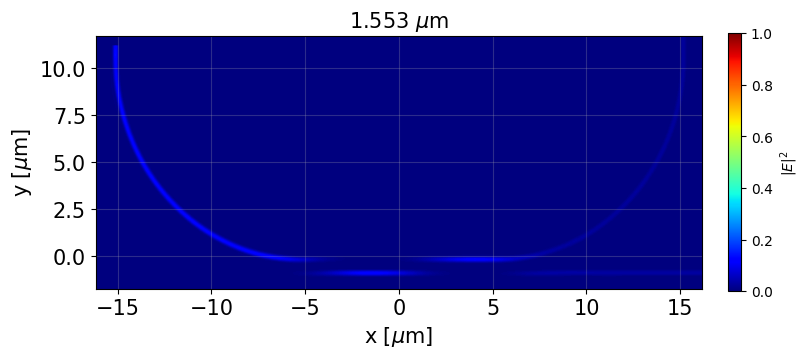

In [366]:
# Importa o campo elétrico - abs^2.
eField = np.abs(np.squeeze(fdtdApi.getelectric("monitor")))**2

# Apresenta o campo elétrico obtido.
indxLambda = 9
x_eField = fdtdApi.getdata("monitor", "x")
y_eField = fdtdApi.getdata("monitor", "y")
lmbd = nu2lambda(fdtdApi.getdata("monitor", "f"))
xmin = 1e6 * np.min(x_eField)
xmax = 1e6 * np.max(x_eField)
ymin = 1e6 * np.min(y_eField)
ymax = 1e6 * np.max(y_eField)

# Escala linear.
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(111)
im1 = ax1.imshow(np.rot90(eField[:, :, indxLambda]), cmap='jet', extent=[xmin, xmax, ymin, ymax], vmin=0, vmax=1)

colorbar = plt.colorbar(im1, fraction=0.02, pad=0.04)
colorbar.set_label(r'$|E|^2$')

ax1.set_xlabel(r'x [$\mu$m]', fontsize=15)
ax1.set_ylabel(r'y [$\mu$m]', fontsize=15)
ax1.set_title(r'%4.3f $\mu$m' % (lmbd[indxLambda] / um), fontsize=15)
ax1.grid(which='major', alpha=0.25)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.savefig('TM eField linear Otimizado.png', bbox_inches='tight')
plt.show()


C:\Users\alves\AppData\Local\Temp\ipykernel_5832\3588196559.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax1.set_title(r'%4.3f $\mu$m' % (lmbd[indxLambda] / um), fontsize=15)


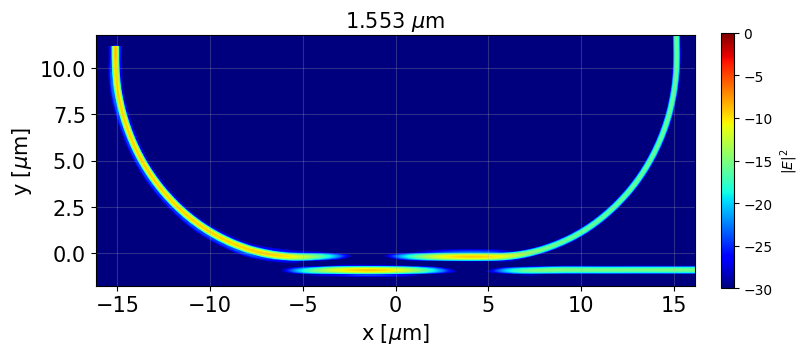

In [367]:
# Escala log.
fig2 = plt.figure(figsize=(8, 8))
ax1 = fig2.add_subplot(111)
im2 = ax1.imshow(10 * np.log10(np.rot90(eField[:, :, indxLambda])), cmap='jet', extent=[xmin, xmax, ymin, ymax], vmin=-30, vmax=0)

colorbar = plt.colorbar(im2, fraction=0.02, pad=0.04)
colorbar.set_label(r'$|E|^2$')

ax1.set_xlabel(r'x [$\mu$m]', fontsize=15)
ax1.set_ylabel(r'y [$\mu$m]', fontsize=15)
ax1.set_title(r'%4.3f $\mu$m' % (lmbd[indxLambda] / um), fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax1.grid(which='major', alpha=0.25)

plt.tight_layout()
plt.savefig(' TM eField log Otimizado.png', bbox_inches='tight')
plt.show()


## Transmissão

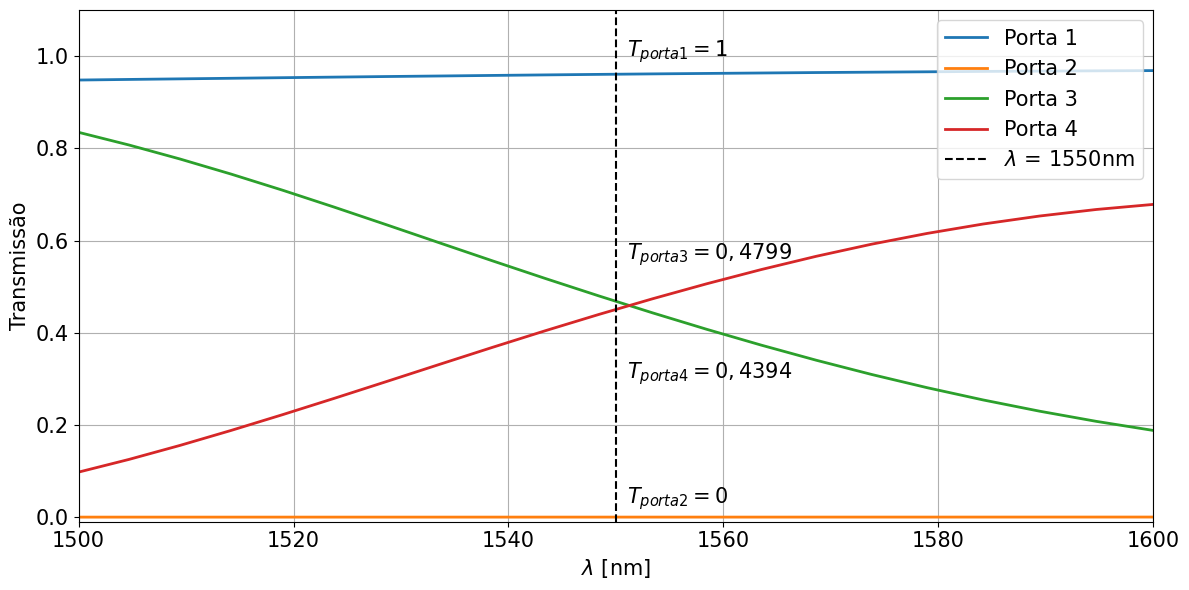

In [375]:
# Apresenta a transmissão do dispositivo em cada porta.
fig3 = plt.figure(figsize=(12, 6))
for i in range(2):
    ports = fdtdApi.getresult("FDTD::ports::port upper %d" % (i+1), "T")
    plt.plot(ports['lambda']/nm, np.abs(ports['T']), linewidth=2)
    ports = fdtdApi.getresult("FDTD::ports::port lower %d" % (i+1), "T")
    plt.plot(ports['lambda']/nm, np.abs(ports['T']), linewidth=2)

plt.plot([1550, 1550], [-0.01, 1.1], 'k--')
# plt.plot([1500, 1600], [0.5, 0.5], 'k--')

plt.xlabel(r'$\lambda$ [nm]', fontsize=15)
plt.ylabel('Transmissão', fontsize=15)
plt.xlim([wvlngth_start/nm, wvlngth_stop/nm])
plt.ylim([-0.01, 1.1])
# plt.title('Length - %1.f um' % (lc/um))
plt.grid(True)

# plt.gca().set_xticks(np.arange(1.5, 1.6, 0.01), minor=True)
plt.gca().grid(which='minor', alpha=0.25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(['Porta 1', 'Porta 2', 'Porta 3', 'Porta 4', '$\lambda$ = 1550nm'], loc='upper right', fontsize=15)

# LEGENDA VERTICAL
plt.text(1551, 1,r'$T_{porta1}=1$', rotation = 00, fontsize=15)
plt.text(1551, 0.56,r'$T_{porta3}=0,4799$', rotation = 00, fontsize=15)
plt.text(1551, 0.3,r'$T_{porta4}=0,4394$', rotation = 00, fontsize=15)
plt.text(1551, 0.03,r'$T_{porta2}=0$', rotation = 00, fontsize=15)

plt.tight_layout()
plt.savefig('TM eField ' + 'transmission Otimizado.png', bbox_inches='tight')
plt.show()


In [376]:
print(10*np.log10(0.4799+0.4394))

-0.3654273988329242


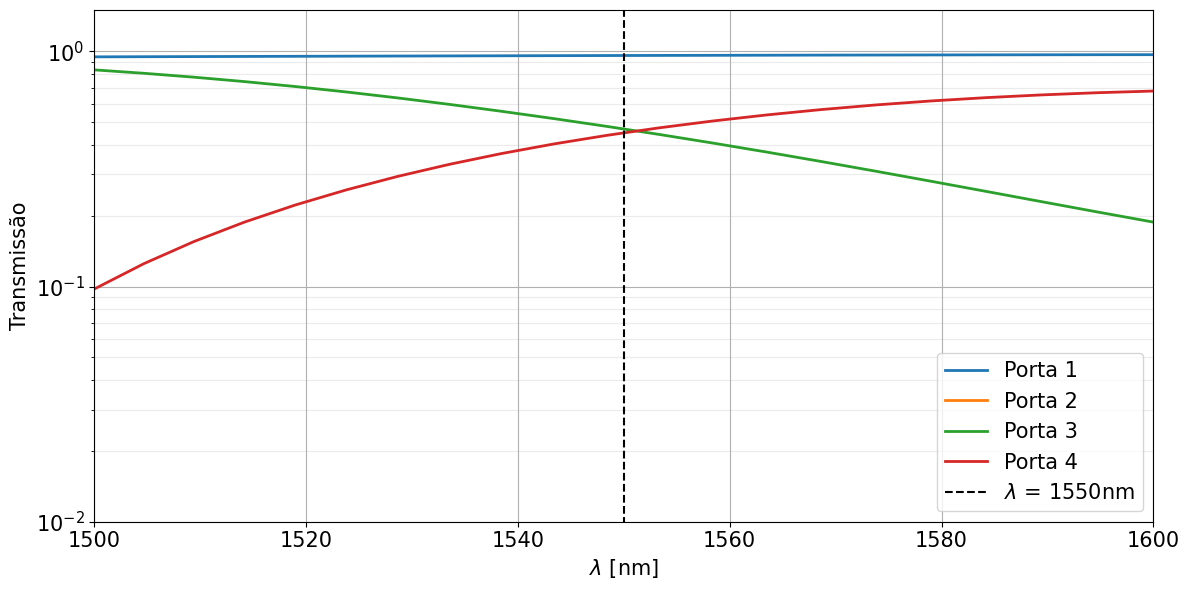

In [369]:
# Apresenta a transmissão do dispositivo em cada porta em escala logarítmica.
fig3 = plt.figure(figsize=(12, 6))
for i in range(2):
    # Transmissão das portas superiores
    ports = fdtdApi.getresult("FDTD::ports::port upper %d" % (i+1), "T")
    plt.plot(ports['lambda'] / nm, np.abs(ports['T']), label="Port upper 0%d" % (i+1), linewidth=2)
    
    # Transmissão das portas inferiores
    ports = fdtdApi.getresult("FDTD::ports::port lower %d" % (i+1), "T")
    plt.plot(ports['lambda'] / nm, np.abs(ports['T']), label="Port lower 0%d" % (i+1), linewidth=2)

# Linha vertical para um comprimento de onda específico
plt.plot([1550, 1550], [1e-6, 1e2], 'k--')

# Definindo a escala logarítmica para o eixo y
plt.yscale('log')

# Definindo os limites para o gráfico
plt.xlabel(r'$\lambda$ [nm]', fontsize=15)
plt.ylabel('Transmissão', fontsize=15)
plt.xlim([wvlngth_start / nm, wvlngth_stop / nm])
plt.ylim([1e-2, 1.5])

# Ativando a grade
plt.grid(True)
plt.gca().grid(which='minor', alpha=0.25)
plt.tick_params(axis='both', which='major', labelsize=15)

# Adicionando a legenda
plt.legend(['Porta 1', 'Porta 2', 'Porta 3', 'Porta 4', '$\lambda$ = 1550nm'], loc='lower right', fontsize=15)

# Ajuste de layout e salvando o gráfico
plt.tight_layout()
plt.savefig('TM eField ' + 'transmission_log Otimizado.png', bbox_inches='tight')
plt.show()


## Otimizaçãodo dispositivo

In [162]:
from scipy.optimize import curve_fit

In [213]:

lc_start = 10 * um
lc_stop = 13 * um
lc_points = 20
lc = np.linspace(lc_start, lc_stop, lc_points)

In [214]:
portsUpper = np.zeros([lc_points, 2, nmbFrqPnts])
portsLower = np.zeros([lc_points, 2, nmbFrqPnts])

In [215]:
# for i in range(len(lc)):
#     lc_wav = lc[i]
    
#     fdtdApi.switchtolayout()

#     simulation_time = (np.pi * wg90Raius + lc_wav) * 7 / c + 200e-15
#     fdtdApi.setnamed("FDTD", "simulation time", simulation_time)

#     # Alocando o wg_bend e guias retos auxiliares
#     fdtdApi.setnamed("right", "x", lc_wav/2)
#     fdtdApi.setnamed("left", "x", -lc_wav/2)
#     fdtdApi.setnamed("wg_1", "x", -(lc_wav + wg90Raius*2)/2)
#     fdtdApi.setnamed("wg_2", "x", (lc_wav + wg90Raius*2)/2)

#     # Alocando os guias retos
#     fdtdApi.setnamed("Lc", "enabled", 1)
#     fdtdApi.setnamed("Lc_lower", "enabled", 1)
#     fdtdApi.setnamed("Lc", "x span", lc_wav)
#     fdtdApi.setnamed("Lc_lower", "x span", lc_wav + wg90Raius*2 + 4*um)

#     # Alocando as portas
#     fdtdApi.setnamed("FDTD::ports::port upper 1", "x", -(lc_wav + wg90Raius*2)/2)
#     fdtdApi.setnamed("FDTD::ports::port upper 2", "x", (lc_wav + wg90Raius*2)/2)
#     fdtdApi.setnamed("FDTD::ports::port lower 2", "x", (lc_wav + wg90Raius*2)/2)
#     fdtdApi.setnamed("FDTD::ports::port lower 1", "x", -(lc_wav + wg90Raius*2)/2)

#     # Alocando Solver
#     fdtdApi.setnamed("FDTD", "x span", lc_wav + wg90Raius*2 + 2*um)
#     fdtdApi.setnamed("monitor", "x span", lc_wav + wg90Raius*2 + 2*um)

#     filename = "DC_FDTD_CBand_%d_nm_%03d_um" % (gap/nm, lc_wav/um)
#     fdtdApi.save(filename)
#     fdtdApi.run(3)

#     for j in range(2):
#         portsUpper[i, j, :] = fdtdApi.getresult("FDTD::ports::port upper %d" % (j+1), "T")['T']
#         portsLower[i, j, :] = fdtdApi.getresult("FDTD::ports::port lower %d" % (j+1), "T")['T']


In [216]:
# Extração do comprimento de onda
wvl = fdtdApi.getresult("FDTD::ports::port upper 1", "T")['lambda']

In [ ]:
# fig, ax = plt.subplots(figsize=(6, 4))
# for i in range(2):
#     ax.plot(lc / um, np.abs(portsLower[:, 2, i]), 'o-', label=r'%5.1f nm' % (wvl[i] / nm), linewidth=2)

# ax.set_xlabel('Comprimento de acomplamento [um]', fontsize=15)
# ax.set_ylabel('Transmissão', fontsize=15)
# ax.legend(bbox_to_anchor=(-1.05, 1), loc='upper left')
# ax.grid(True)
# plt.savefig('Otização.png', bbox_inches='tight')
# plt.show()

# plt.figure(figsize=(6, 4))

C:\Users\alves\AppData\Local\Temp\ipykernel_5832\241102902.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(lc / um, np.abs(portsLower[:, 1, i]), 'o-', label=r'%5.1f nm' % (wvl[i] / nm), linewidth=2)


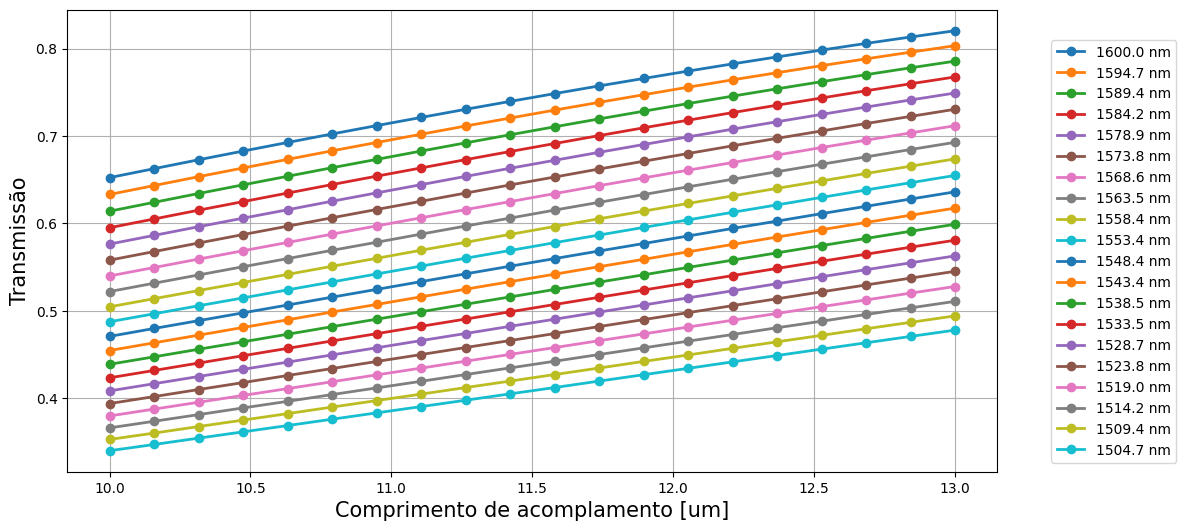

In [243]:
plt.figure(figsize=(12,6))
for i in range(0, 20):
    plt.plot(lc / um, np.abs(portsLower[:, 1, i]), 'o-', label=r'%5.1f nm' % (wvl[i] / nm), linewidth=2)

plt.xlabel('Comprimento de acomplamento [um]', fontsize=15)
plt.ylabel('Transmissão', fontsize=15)
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right')
plt.grid(True)
plt.savefig('Otização.png', bbox_inches='tight')
plt.show()

C:\Users\alves\AppData\Local\Temp\ipykernel_5832\2856877574.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(lc / um, np.abs(portsLower[:, 1, i]), 'o-', label=r'%5.1f nm' % (wvl[i] / nm), linewidth=2)
C:\Users\alves\AppData\Local\Temp\ipykernel_5832\2856877574.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axins.plot(lc / um, np.abs(portsLower[:, 1, i]), '-o', label=r'%5.1f nm' % (wvl[i] / nm), linewidth=2)
C:\Users\alves\AppData\Local\Temp\ipykernel_5832\2856877574.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


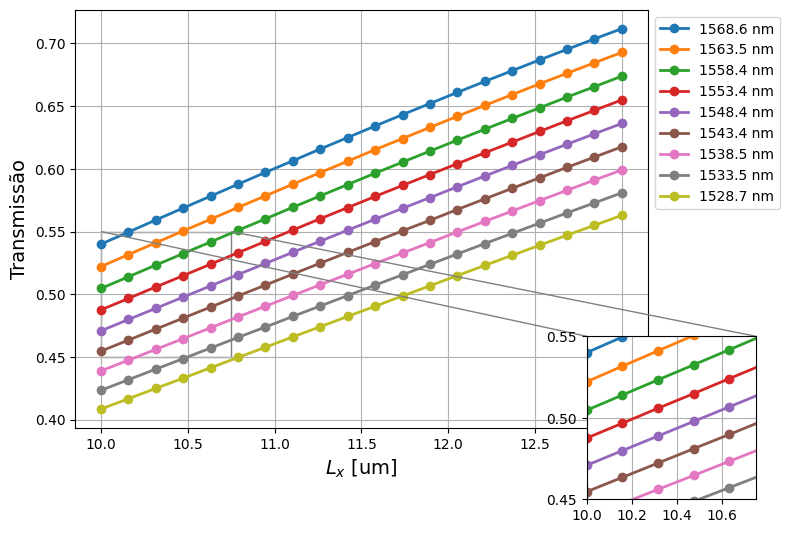

In [314]:
# Plotando os resultados
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes, mark_inset

fig, ax = plt.subplots(figsize=(8, 5))
for i in range(6, 15):
    plt.plot(lc / um, np.abs(portsLower[:, 1, i]), 'o-', label=r'%5.1f nm' % (wvl[i] / nm), linewidth=2)

ax.set_xlabel('$L_x$ [um]', fontsize=14)
ax.set_ylabel('Transmissão', fontsize=14)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.grid(True)

axins = zoomed_inset_axes(ax, 1.3, loc='upper left', bbox_to_anchor=[550, 200], borderpad=3)
for i in range(6, 15):
    axins.plot(lc / um, np.abs(portsLower[:, 1, i]), '-o', label=r'%5.1f nm' % (wvl[i] / nm), linewidth=2)
axins.set_xlim(10, 10.75)
axins.set_ylim(.45, .55)

axins.yaxis.get_major_locator().set_params(nbins=4)
axins.xaxis.get_major_locator().set_params(nbins=4)
axins.grid()

mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('Otimização_atualizado.png', bbox_inches='tight')
plt.show()

C:\Users\alves\AppData\Local\Temp\ipykernel_5832\3231737870.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(lc / um, np.abs(portsLower[:, 1, i]), 'o-', label=r'%5.1f nm' % (wvl[i] / nm), linewidth=2)
C:\Users\alves\AppData\Local\Temp\ipykernel_5832\3231737870.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axins.plot(lc / um, np.abs(portsLower[:, 1, i]), '-o', label=r'%5.1f nm' % (wvl[i] / nm), linewidth=2)
C:\Users\alves\AppData\Local\Temp\ipykernel_5832\3231737870.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


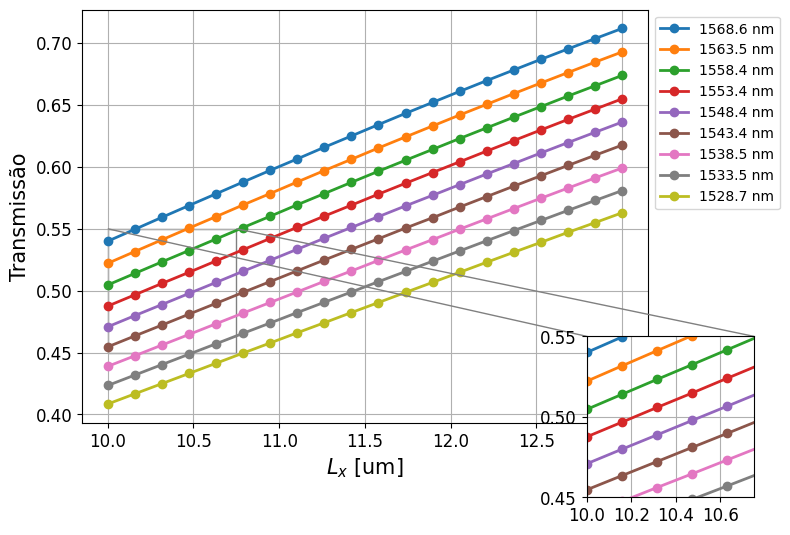

In [315]:
# Plotando os resultados
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

fig, ax = plt.subplots(figsize=(8, 5))
for i in range(6, 15):
    plt.plot(lc / um, np.abs(portsLower[:, 1, i]), 'o-', label=r'%5.1f nm' % (wvl[i] / nm), linewidth=2)

# Ajustando os labels e as legendas
ax.set_xlabel('$L_x$ [um]', fontsize=15)
ax.set_ylabel('Transmissão', fontsize=15)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.grid(True)

# Aumentando o tamanho da fonte dos ticks no gráfico principal
ax.tick_params(axis='both', which='major', labelsize=12)  # Ticks principais maiores
ax.tick_params(axis='both', which='minor', labelsize=10)  # Ticks menores

# Criando a área de zoom
axins = zoomed_inset_axes(ax, 1.3, loc='upper left', bbox_to_anchor=[550, 200], borderpad=3)
for i in range(6, 15):
    axins.plot(lc / um, np.abs(portsLower[:, 1, i]), '-o', label=r'%5.1f nm' % (wvl[i] / nm), linewidth=2)

# Definindo os limites do zoom
axins.set_xlim(10, 10.75)
axins.set_ylim(0.45, 0.55)

# Ajustando o número de ticks no gráfico de zoom
axins.yaxis.get_major_locator().set_params(nbins=4)
axins.xaxis.get_major_locator().set_params(nbins=4)

# Aumentando o tamanho da fonte dos ticks no gráfico de zoom
axins.tick_params(axis='both', which='major', labelsize=12)  # Ticks principais maiores
axins.tick_params(axis='both', which='minor', labelsize=10)  # Ticks menores

# Adicionando o grid na área de zoom
axins.grid(True)

# Marcando o zoom no gráfico principal
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

# Ajustando o layout e salvando a figura
plt.tight_layout()
plt.savefig('Otimização_atualizado_02.png', bbox_inches='tight')
plt.show()
